**1. Import Libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Load data
housing = fetch_california_housing()

# Features (X)
X = pd.DataFrame(housing.data, columns=housing.feature_names)

# Target (y)
y = pd.Series(housing.target, name='MedHouseVal')

print(X.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [20]:
print(y.head())

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [22]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


**2. Preprocessing**

In [25]:
df = pd.concat([X, y], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
df.size

185760

In [38]:
df.shape

(20640, 9)

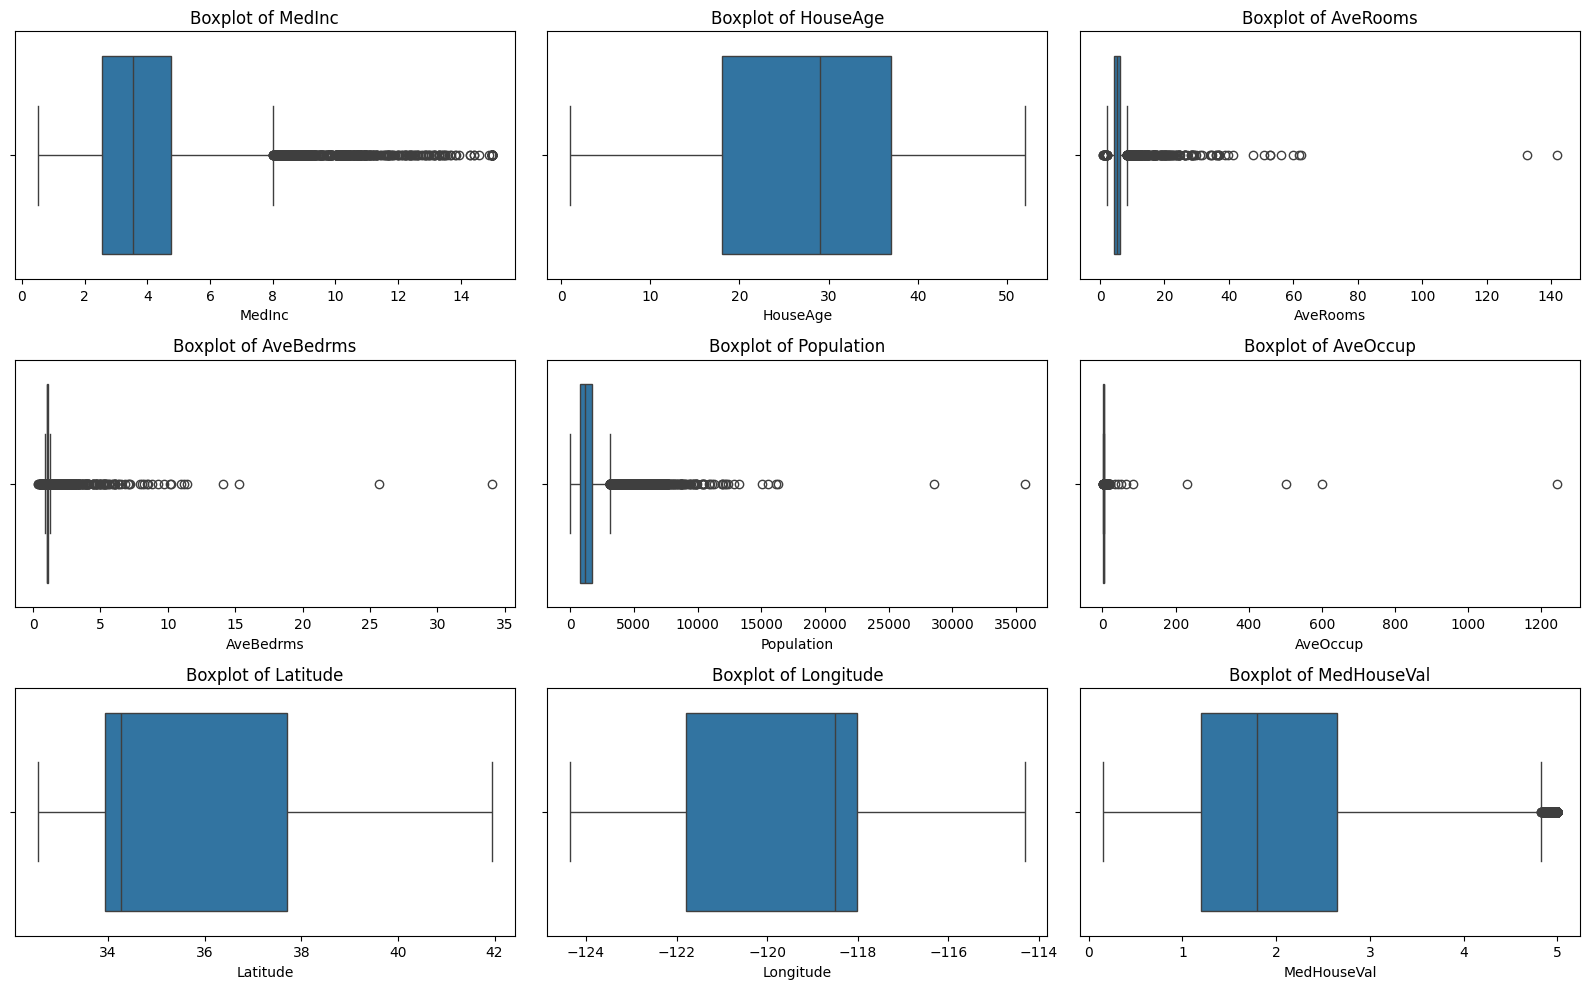

In [27]:
# checking outliers
import seaborn as sns

plt.figure(figsize=(16, 10))

for i, col in enumerate(df.columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**3. `train_test_split`**

In [29]:
# Since the dataset contains outliers but sometimes outliers are even bit necessary so first will train w outliers and let's check the mse and r2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Train the Model**

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**5. Model Prediction**

In [31]:
y_pred = model.predict(X_test)

**6. Evaluation**

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


**7. Interpretation**

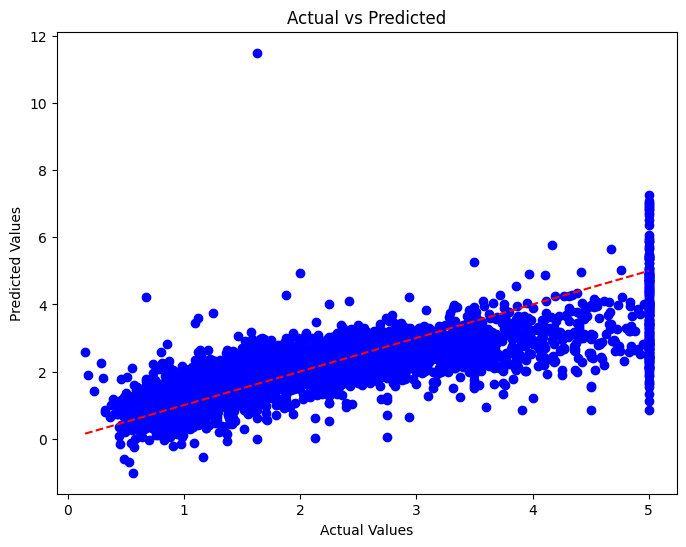

In [33]:
# 1. Plot of Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

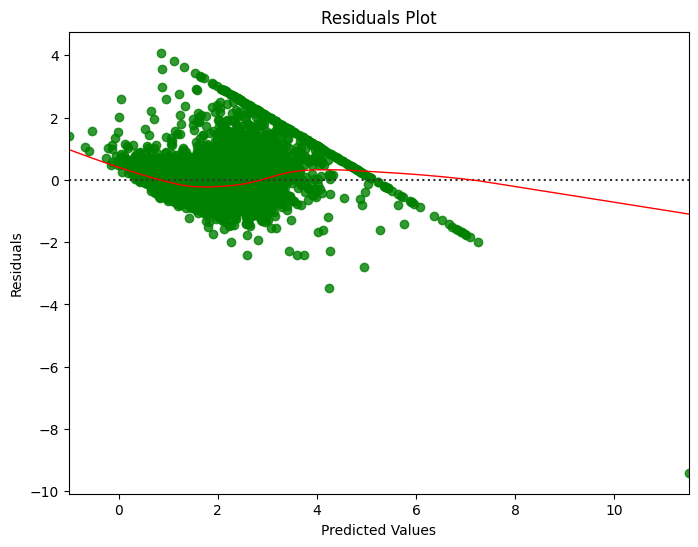

In [35]:
# Calculate residuals
residuals = y_test - y_pred

# Residuals plot
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green', line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [36]:
# Evaluate on training data
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate on test data
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training MSE: {train_mse}")
print(f"Training R²: {train_r2}")
print(f"Test MSE: {test_mse}")
print(f"Test R²: {test_r2}")

# Interpret the results
if train_r2 > 0.8 and test_r2 < 0.5:
    print("The model is overfitting!")
elif train_r2 < 0.5 and test_r2 < 0.5:
    print("The model is underfitting!")
else:
    print("The model is optimized!")


Training MSE: 0.5179331255246699
Training R²: 0.6125511913966952
Test MSE: 0.5558915986952444
Test R²: 0.5757877060324508
The model is optimized!
